# Logistic Regression with Python (Neural Network mindset)

Implementation of a simple logistic regression model for detecting cats in pictures.

General steps:
1. Load dataset
2. Flatten dataset
3. Normalize pixel values to range between 0 and 1
4. Forward propagation
    - Sigmoid function
    - Prediction
   

### Imports

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random

### Laod dataset

In [223]:
# Load .h5 training ad testing dataset files
training_dataset = h5py.File('../../dataset/coursera/train_catvnoncat.h5', 'r')
testing_dataset = h5py.File('../../dataset/coursera/test_catvnoncat.h5', 'r')

In [224]:
# Files keys/columns
print(training_dataset.keys())
print(testing_dataset.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [343]:
# Separate training (x) and testing inputs and true labels (y)
x_training = np.asarray(training_dataset['train_set_x'])
y_training = np.asarray(training_dataset['train_set_y'])
x_testing = np.asarray(testing_dataset['test_set_x'])
y_testing = np.asarray(testing_dataset['test_set_y'])

# Extra training and testing variables for later use on random predictions
training_images = np.asarray(training_dataset['train_set_x'])
testing_images = np.asarray(testing_dataset['test_set_x'])

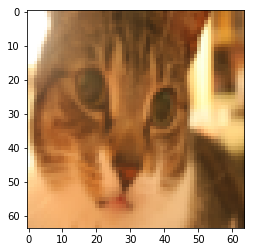

In [344]:
plt.imshow(x_training[200])

In [345]:
# Dataset sizes
m_train = x_training.shape[0]
m_test = x_testing.shape[0]
num_pixel = x_training.shape[1]
total_pixel = num_pixel**2

### Preprocessing

In [346]:
# Flatten the pixel dimenions (64 width x 64 height x 3 color chanels) and transpose it
# so we will get every image flattened pixels represented as a matrix column
x_training = x_training.reshape(x_training.shape[0], -1).T
x_testing = x_testing.reshape(x_testing.shape[0], -1).T

# Transform the label arrays from a rank 1 vector to a proper matrix
y_training = y_training.reshape(1, y_training.shape[0])
y_testing = y_testing.reshape(1, y_testing.shape[0])

In [347]:
# One common preprocessing step in machine learning is to center and standardize your dataset, 
# meaning that you substract the mean of the whole numpy array from each example, and then divide 
# each example by the standard deviation of the whole numpy array. But for picture datasets, it 
# is simpler and more convenient and works almost as well to just divide every row of the dataset 
# by 255 (the maximum value of a pixel channel).
x_training = x_training/255
x_testing = x_testing/255

### Model

In [348]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [349]:
# Initialize parameters
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [350]:
# Forward propagation
def propagate(w, b, X, y):
    # number of training samples
    m = X.shape[1]
    # activation step
    A = sigmoid(np.dot(w.T,X) + b)
    # calculate the cost
    cost = (-1/m)*np.sum((y*np.log(A))+(1-y)*np.log(1-A))
    # gradient step
    dw = (1/m) * np.dot(X, (A-y).T)
    db = (1/m) * np.sum(A-y)
    
    gradients = {"dw": dw, "db": db}
    return gradients, cost

In [351]:
# Optimization step
def optimize(w, b, X, y, num_iterations=100, learning_rate=0.01):
    costs = []
    for i in range(num_iterations):
        # calculate gradients and cost for one gradient descent step
        gradients, cost = propagate(w, b, X, y)
        # get gradient values
        dw = gradients["dw"]
        db = gradients["db"]
        costs.append(cost)
        # update weights and bias
        w = w - learning_rate*dw
        b = b - learning_rate*db
    # return the optimized parameters
    params = {"w":w, "b":b}
    return params, costs

In [352]:
# Prediction
def predict(w, b, X):
    m = X.shape[1]
    predictions = np.zeros((1,m))
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(m):
        predictions[0, i] = 1 if A[0, i] > 0.5 else 0
    return predictions

### Training the model

Train accuracy: 98.56459330143541 %
Test accuracy: 70.0 %


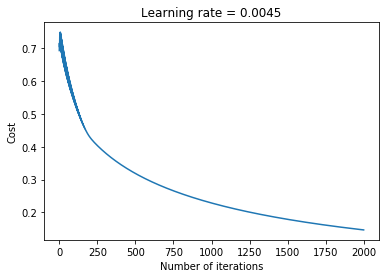

In [353]:
# Initialize the parameters
w, b = initialize_parameters(x_training.shape[0])

# About the learning rate:
# If your learning rate or alpha is too large, each iteration will overshoot in the direction 
# towards the minimum and would thus make the cost at each iteration oscillate or even diverge 
# which is what is appearing to be happening. In your case, the cost is diverging or increasing 
# at each iteration to the point where it is so large that it can't be represented using floating 
# point precision. As such, one other option is to decrease your learning rate alpha until you see 
# that the cost function is decreasing at each iteration. A popular method to determine what the best 
# learning rate would be is to perform gradient descent on a range of logarithmically spaced values 
# of alpha and seeing what the final cost function value is and choosing the learning rate that 
# resulted in the smallest cost.
# from : https://stackoverflow.com/questions/35419882/cost-function-in-logistic-regression-gives-nan-as-a-result
#
# Training with a learning_rate like 0.5 will produce the above mentioned effect
learning_rate = 0.0045
num_iteractions = 2000
parameters, costs = optimize(w, b, x_training, y_training, num_iteractions, learning_rate)

# Optimized weights and bias
w = parameters["w"]
b = parameters["b"]

# Predict both training and test datasets
train_predictions = predict(w, b, x_training)
test_predictions = predict(w, b, x_testing)

print("Train accuracy: {} %".format(100 - np.mean(np.abs(train_predictions - y_training)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(test_predictions - y_testing)) * 100))

plt.plot(costs)
plt.title("Learning rate = "+str(learning_rate))
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.show()

### Running random tests

In [373]:
def random_prediction(data, images):
    # Random images indexes
    random_idx = np.random.randint(low=0, high=data.shape[1], size=10)
    # Predict each random image
    random_predictions = []
    for i in random_idx:
        image = data.T[i].reshape(-1,1)
        random_predictions.append(predict(w, b, image))

    random_predictions_labels = ['Meow!' if i[0][0] == 1.0 else 'Not a cat!' for i in random_predictions]

    label_counter = 0
    for i in random_idx:
        plt.figure()
        plt.imshow(images[i])
        plt.title(random_predictions_labels[label_counter])
        plt.show()
        label_counter += 1

Random prediction on training dataset :


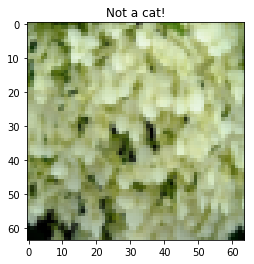

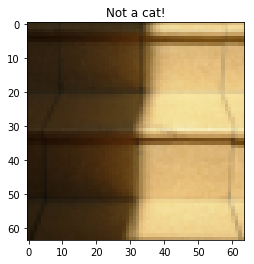

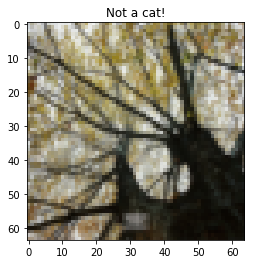

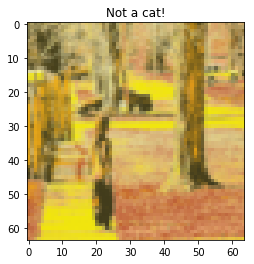

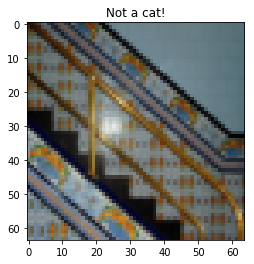

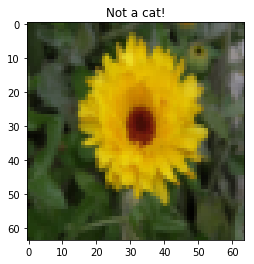

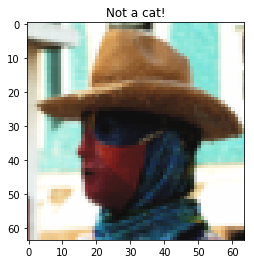

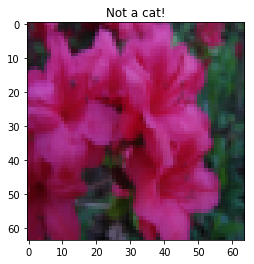

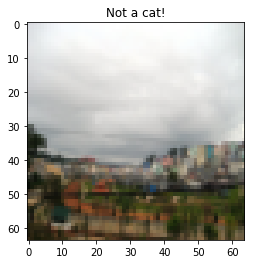

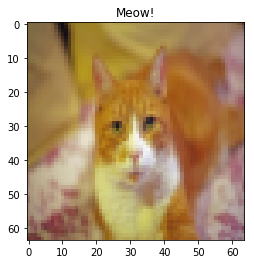

Random prediction on testing dataset :


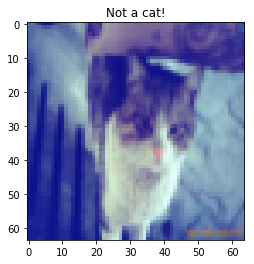

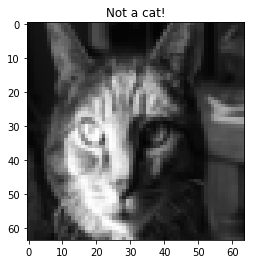

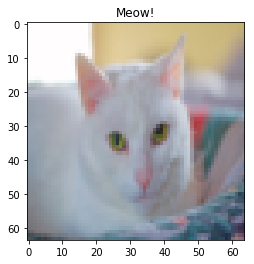

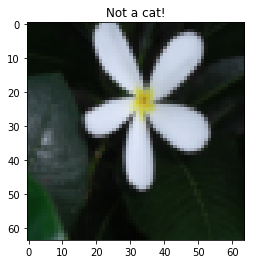

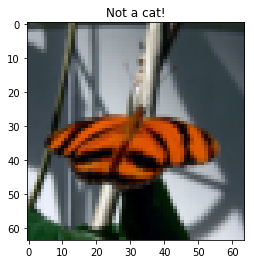

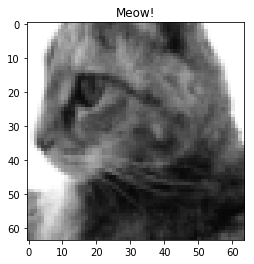

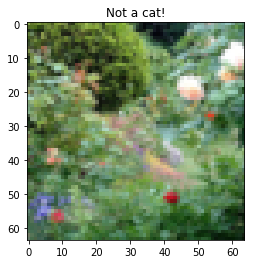

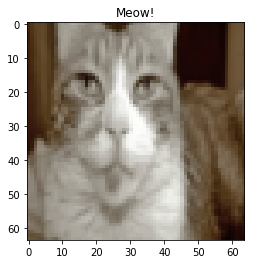

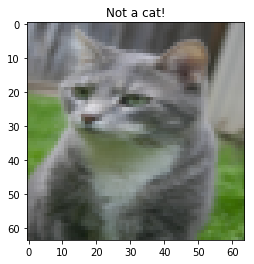

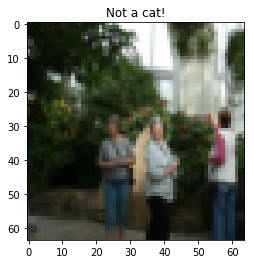

In [374]:
# Running on training dataset
print("Random prediction on training dataset :")
random_prediction(x_training, training_images)
# Running on testing dataset
print("Random prediction on testing dataset :")
random_prediction(x_testing, testing_images)